<a href="https://colab.research.google.com/github/M726SoledadPS/Papel/blob/main/CODE_FinalNK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paso 1. Carga de Librerías y Datos**

Statsmodels es una de las librerías científicas de Python principalmente orientada al análisis de datos, ciencia de datos y estadística. Trabaja sobre las librerías numéricas NumPy y SciPi, y se integra con Pandas para el manejo de datos. Las funciones gráficas se basan en la librería Matplotlib. Statsmodels también ofrece conjuntos de datos (y metadatos) para su uso en ejemplos, tutoriales etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# Se emple la función wget que permita bajar al espacio de trabajo los datos para análisis
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/M726SoledadPS/Papel/main/data-final-nk.csv

--2023-02-23 23:14:27--  https://raw.githubusercontent.com/M726SoledadPS/Papel/main/data-final-nk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324576 (317K) [text/plain]
Saving to: ‘data-final-nk.csv’

data-final-nk.csv   100%[===================>] 316.97K  --.-KB/s    in 0.03s   

2023-02-23 23:14:27 (9.38 MB/s) - ‘data-final-nk.csv’ saved [324576/324576]



In [ ]:
df.head(10)

In [ ]:
# Utilizando pandas, se carga archivo en memoria como dataframe
df = pd.read_csv("data-final-nk.csv")

# **Paso 2. Análisis de Datos**

**Valores vacios**

In [ ]:
#df.isnull().head(10)

In [ ]:
# Comprobamos si alguna columna tiene valores nulos
df.isna().any()

JUMBO                                          False
Papel                                          False
 Espesor                                       False
 Gramaje                                       False
Humedad                                        False
CARA CBFC                                      False
CARA CBFL                                      False
CARA CCFL                                      False
CARA Celulosa B FC                             False
CARA Recorte Kraft Laja                        False
CARA Recorte Valdivia (Pta. Tratamiento)       False
REVERSO CBFC                                   False
CARA Recorte Maule (Pta. Tratamiento)          False
REVERSO CBFL                                   False
REVERSO CCFL                                   False
REVERSO Celulosa B FC                          False
REVERSO Pulpa 261F                             False
REVERSO Pulpa BO Paper                         False
REVERSO Pulpa mecÃ¡nica                       

**Correlación**

Para ver si existe correlación entre las variables lo más práctico es calcular la matriz de correlación.  Es un paso importante porque puede afectar negativamente al rendimiento del algoritmo. Las variables que presentan un índice de correlación muy alto ( >0,9)  deben excluirse del análisis (por ejemplo, la función “drop”). Como podemos ver, en este caso no es necesario eliminar ninguna

In [ ]:
# Eliminar variables altamente correlacionas >.9
# age, yrs_married -- Lógica
# Correlación Positiva -- religious/rate_marriage, age/yrs_marriage
# Correlación Negativa: affairs/children, religious

In [ ]:
print(df.corr())

                                              Espesor   Gramaje   Humedad  \
 Espesor                                     1.000000  0.986634  0.376560   
 Gramaje                                     0.986634  1.000000  0.397111   
Humedad                                      0.376560  0.397111  1.000000   
CARA CBFC                                   -0.345641 -0.358002 -0.018012   
CARA CBFL                                         NaN       NaN       NaN   
CARA CCFL                                   -0.259911 -0.276375 -0.098529   
CARA Celulosa B FC                          -0.054565 -0.070120 -0.140188   
CARA Recorte Kraft Laja                      0.123620  0.146991  0.040546   
CARA Recorte Valdivia (Pta. Tratamiento)     0.186955  0.193608 -0.046797   
REVERSO CBFC                                -0.243520 -0.229150  0.040539   
CARA Recorte Maule (Pta. Tratamiento)             NaN       NaN       NaN   
REVERSO CBFL                                      NaN       NaN       NaN   

In [ ]:
#age, yrs_married -- Lógicamente no son independientes, para eliminarlos:
#df.drop(['age','yrs_married'], axis = 1, inplace = True)
#df_head()

El signo del índice de correlación también nos da información.  Si el índice de correlación entre dos variables es positivo, significa que, si una de ellas aumenta, la otra también lo hace. Por el contrario,  cuando el signo es negativo, si una variable aumenta, la otra, disminuye.  Por ejemplo, para affairs y rate_marriage es negativo. Esto indica que las personas que valoran más su matrimonio (rate_marriage creciente), tienen menos aventuras extramaritales (affairs decreciente).

# **Paso 4. Creación DataSet**

In [ ]:
# Creamos un dataset desde el archivo que se descargo por ahora usamos todos los datos
dataset = df.values

In [ ]:
# Separamos datos CARA CBFC
X1=dataset[:,2:5] #aquí considera las N primeras variables 
Y1=dataset[:,5] #la variable Y es la variable a predecir
print(Y1)

[0.006398665154813 0.006398665154813 0.006398665154813 ... 0.0 0.0 0.0]


In [ ]:
# Separamos datos CARA CBFL
X2=dataset[:,2:5] #aquí considera las N primeras variables 
Y2=dataset[:,6] #la variable Y es la variable a predecir
print(Y2)

[0 0 0 ... 0 0 0]


In [ ]:
# Separamos datos CARA CCFL 
X3=dataset[:,2:5] #aquí considera las N primeras variables 
Y3=dataset[:,7] #la variable Y es la variable a predecir
print(Y3)

[0.102177842832273 0.102177842832273 0.102177842832273 ...
 0.106359678393134 0.106359678393134 0.104184747214418]


In [ ]:
# Separamos datos CARA Celulosa B FC
X4=dataset[:,2:5] #aquí considera las N primeras variables 
Y4=dataset[:,8] #la variable Y es la variable a predecir
print(Y4)

[0.0022613293999869 0.0022613293999869 0.0022613293999869 ...
 0.0159874131089297 0.0159874131089297 0.0130623714145151]


In [ ]:
# Separamos datos CARA Recorte Kraft Laja
X5=dataset[:,2:5] #aquí considera las N primeras variables 
Y5=dataset[:,9] #la variable Y es la variable a predecir
print(Y5)

[0.0 0.0 0.0 ... 0.0 0.0 0.0]


In [ ]:
# Separamos datos CARA Recorte Valdivia (Pta. Tratamiento)
X6=dataset[:,2:5] #aquí considera las N primeras variables 
Y6=dataset[:,10] #la variable Y es la variable a predecir
print(Y6)

[0.016237522370939 0.016237522370939 0.016237522370939 ... 0.0 0.0 0.0]


In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X1=np.asarray(X1).astype(np.float32)
Y1=np.asarray(Y1).astype(np.float32)

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X2=np.asarray(X2).astype(np.float32)
Y2=np.asarray(Y2).astype(np.float32)

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X3=np.asarray(X3).astype(np.float32)
Y3=np.asarray(Y3).astype(np.float32)

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X4=np.asarray(X4).astype(np.float32)
Y4=np.asarray(Y4).astype(np.float32)

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X5=np.asarray(X5).astype(np.float32)
Y5=np.asarray(Y5).astype(np.float32)

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X6=np.asarray(X6).astype(np.float32)
Y6=np.asarray(Y6).astype(np.float32)

# **Paso 5. División conjunto de datos**

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.3)

In [ ]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.3)

In [ ]:
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size=0.3)

In [ ]:
X4_train,X4_test,Y4_train,Y4_test = train_test_split(X4,Y4,test_size=0.3)

In [ ]:
X5_train,X5_test,Y5_train,Y5_test = train_test_split(X5,Y5,test_size=0.3)

In [ ]:
X6_train,X6_test,Y6_train,Y6_test = train_test_split(X6,Y6,test_size=0.3)

# **Paso 6. Creación I.A.**

**Red Neuronal**

In [ ]:
#Uso de libreerias a un nivel excelsior
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model1():
  model1 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,   activation='sigmoid')
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model1

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model2():
  model2 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model2.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model2

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model3():
  model3 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model3.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model3

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model4():
  model4 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model4.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model4

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model5():
  model5 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model5.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model5

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model6():
  model6 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[3]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model6.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model6

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model1 = build_model1()

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model2 = build_model2()

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model3 = build_model3()

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model4 = build_model4()

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model5 = build_model5()

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model6 = build_model6()

**Carga Modelo Entrenado**

Si se cuenta con modelo no es necesario entrenar

In [ ]:
#Se emplea libreria adiconal, la que se descarga e instala
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_ts8lytn
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-_ts8lytn
  Resolved https://github.com/tensorflow/docs to commit 49c6a1b871dd512951ae9b70aa7724483d2db4c5
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=178984 sha256=37f2fc41f24c864de09fde7b2dc7ef52e156ea0d539eacedb39ae2ec0e98e2da
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkaai449/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [ ]:
#Se importan librerias 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [ ]:
#Se definen la cantidad de EPOCHS
EPOCHS = 1600

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history1 = model1.fit(
    X1_train,Y1_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 100, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 200, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 300, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 400, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 500, loss:0.0008,  mae:0.0227,  mse:0.0008,  
....................................................................................................
Epoch: 600, loss:0.0008,  mae:0.0227,  mse:0.0008,  
........................

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history2 = model2.fit(
    X2_train,Y2_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 100, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 200, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 300, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 400, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 500, loss:0.0000,  mae:0.0007,  mse:0.0000,  
....................................................................................................
Epoch: 600, loss:0.0000,  mae:0.0007,  mse:0.0000,  
........................

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history3 = model3.fit(
    X3_train,Y3_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:3.0478,  mae:1.7391,  mse:3.0478,  
....................................................................................................
Epoch: 100, loss:2.2633,  mae:1.4979,  mse:2.2633,  
....................................................................................................
Epoch: 200, loss:1.7491,  mae:1.3152,  mse:1.7491,  
....................................................................................................
Epoch: 300, loss:1.1938,  mae:1.0857,  mse:1.1938,  
....................................................................................................
Epoch: 400, loss:1.0513,  mae:1.0162,  mse:1.0513,  
....................................................................................................
Epoch: 500, loss:0.7221,  mae:0.8397,  mse:0.7221,  
....................................................................................................
Epoch: 600, loss:0.3791,  mae:0.6090,  mse:0.3791,  
........................

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history4 = model4.fit(
    X4_train,Y4_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0058,  mae:0.0666,  mse:0.0058,  
....................................................................................................
Epoch: 100, loss:0.0042,  mae:0.0562,  mse:0.0042,  
....................................................................................................
Epoch: 200, loss:0.4294,  mae:0.6427,  mse:0.4294,  
....................................................................................................
Epoch: 300, loss:0.2468,  mae:0.4899,  mse:0.2468,  
....................................................................................................
Epoch: 400, loss:0.0005,  mae:0.0159,  mse:0.0005,  
....................................................................................................
Epoch: 500, loss:0.0265,  mae:0.1613,  mse:0.0265,  
....................................................................................................
Epoch: 600, loss:0.0000,  mae:0.0032,  mse:0.0000,  
........................

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history5 = model5.fit(
    X5_train,Y5_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.6516,  mae:0.7932,  mse:0.6516,  
....................................................................................................
Epoch: 100, loss:0.1301,  mae:0.3512,  mse:0.1301,  
....................................................................................................
Epoch: 200, loss:0.1068,  mae:0.3222,  mse:0.1068,  
....................................................................................................
Epoch: 300, loss:0.0398,  mae:0.1889,  mse:0.0398,  
....................................................................................................
Epoch: 400, loss:0.0183,  mae:0.1304,  mse:0.0183,  
....................................................................................................
Epoch: 500, loss:0.0020,  mae:0.0350,  mse:0.0020,  
....................................................................................................
Epoch: 600, loss:0.0044,  mae:0.0609,  mse:0.0044,  
........................

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history6 = model6.fit(
    X6_train,Y6_train,
    epochs=EPOCHS, verbose=0,batch_size=1024, #para no quedarse en los mínimos locales
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1930,  mae:0.4367,  mse:0.1930,  
....................................................................................................
Epoch: 100, loss:0.0484,  mae:0.2132,  mse:0.0484,  
....................................................................................................
Epoch: 200, loss:0.0001,  mae:0.0089,  mse:0.0001,  
....................................................................................................
Epoch: 300, loss:0.0070,  mae:0.0826,  mse:0.0070,  
....................................................................................................
Epoch: 400, loss:0.0000,  mae:0.0048,  mse:0.0000,  
....................................................................................................
Epoch: 500, loss:0.0000,  mae:0.0051,  mse:0.0000,  
....................................................................................................
Epoch: 600, loss:0.0000,  mae:0.0052,  mse:0.0000,  
........................

In [ ]:
model6.save("model6.red1") # opcional si se quiere grabar

# **Paso 7. Uso de la Red Neuronal**

In [ ]:
print("Aplicación")
gramaje=285 
espesor=457
humedad=8.5

#Predicción
CARA_CBFC= model1.predict(np.array([[gramaje,espesor,humedad]]))
CARA_CBFC=CARA_CBFC*100
#CARA_CBFL=model2.predict(np.array([[gramaje,espesor,humedad]]))
#CARA_CCFL =model3.predict(np.array([[gramaje,espesor,humedad]]))
#CARA_CelulosaBFC =model4.predict(np.array([[gramaje,espesor,humedad]]))
#CARA_Recorte_Kraft_Laja =model5.predict(np.array([[gramaje,espesor,humedad]]))
#CARA_RecV_PtaTratamiento =model6.predict(np.array([[gramaje,espesor,humedad]]))
#Se imprimen resultados
print("CARA CBFC es : %s  " %CARA_CBFC[0] [0])
print("CARA_CBFL es : %s  " %CARA_CBFL[0] [0])
print("CARA_CCFL es : %s  " %CARA_CCFL[0] [0])
print("CARA_CelulosaBFC es : %s  " %CARA_CelulosaBFC[0] [0])
print("CARA_Recorte_Kraft_Laja es : %s  " %CARA_Recorte_Kraft_Laja[0] [0])
print("CARA_Recorte_Valdivia_(Pta.Tratamiento) es : %s  " %CARA_RecV_PtaTratamiento[0] [0])


Aplicación
1/1 [==============================] - 0s 38ms/step
CARA CBFC es : 5.3308196e-07  
CARA_CBFL es : -4.4023833  
CARA_CCFL es : 0.12523791  
CARA_CelulosaBFC es : 0.62463576  
CARA_Recorte_Kraft_Laja es : 2.8919995  
CARA_Recorte_Valdivia_(Pta.Tratamiento) es : -11.132574  


In [ ]:

print("A continuación, ingrese los datos solicitados para obtener una predición de su papel: ")
print("")
print("¡IMPORTANTE! Para los valores utilice punto (.), no coma (,)")
print("")
t=float(input("Ingrese Toneladas de papel que desea fabricar): "))
print("")

#Ingreso de Valores X1 y X2

a=float(input("CBFC   = 0.02: "))
b=float(input("CKFL            = 0.18: "))
c=float(input("Pulpa 262 = 0. "))
d=float(input("Pulpa 261        = 0.3: "))
e=float(input("RecorteMaule      = 0: "))
f=float(input("RecVirtual = 0: "))
g=float(input("RecFab      = 0.01: "))
h=float(input("RecRecirculadoarea070 = 0.03: "))
i=float(input("PulpaSGW =0.2: "))
j=float(input("CelB =0: "))
k=float(input("Reckraft =0: "))
l=float(input("Encolate =0.0002: "))
m=float(input("Sulfato =     0.001: "))                            
n=float(input("Antiespumante   =    0.00003: "))                
ñ=float(input("Retentor   =    0 : "))          
o=float(input("Perform    =     0 :               "))      
p=float(input("CatiofastGM    =     0:               "))  
q=float(input("PolyminSK       =     0.000012 :         "))        
r=float(input("Almidonoxidado   =          0.018:          "))  
s=float(input("almidonnativo =       0.06     :             "))
t=float(input("Aditivosextras       =     0.057  :          "))
u=float(input("TemperaturaPope        =    54:      "))
print("")

print("")


a1=a/t
b1=b/t
c1=c/t
d1=d/t
e1=e/t
f1=f/t
g1=g/t
h1=(h/1000)/t
i1=(i/1000)/t
j1=(j/1000)/t
k1=(k/1000)/t
l1=(l/1000)/t
m1=(m/1000)/t
n1=(n/1000)/t

c1=a*825
c2=b*767
c3=c*321.32
c4=d*165
c5=e*407.06
c6=f*130
c7=g*280
c8=h*1.66
c9=i*1.66*t
c10=j*2.89*t
c11=k*2.79*t
c12=l*3.64*t
c13=m*3.4*t
c14=n*2.84*t

C=c1+c2+c3+c4+c5+c6+c7+c8+c9+c10+c11+c12+c13+c14
ct=C/t
#I.A. realiza la estimación
gramaje=model.predict(np.array([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,ñ,o,p,q,r,s,t,u]]))
#gramaje=model_gramaje.predict(np.array([[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1,n1]]))
#espesor=model_espesor.predict(np.array([[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1,n1]]))
#Cálculos para determinar error absoluto
#suma=a+b
#error_absoluto=abs(suma-y)

print("El gramaje será: %s g/m2. apróximadamente" % gramaje[0] [0])
#print("El espesor será: %s um. apróximadamente" % espesor[0] [0])
print("")
#print("El costo por tonelada será de aproximadamente:",ct,"USD")

#print("El error absoluto es de: %s" % error_absoluto[0][0])

# **Paso 8. Error de la predicción**

Mean Squared Error (MSE) o error cuadrático medio, es la función de error más básica y usada. Se define como el valor medio de los cuadrados de la diferencia entre los valores predichos y los valores reales:

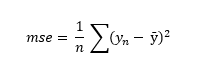

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predicciones = model1.predict(X1_test)

mse = mean_squared_error(
        y_true = Y1_test,
        y_pred = predicciones,
        squared = True   # default=True => Si es "True" revuelve 'MSE value', si es "False" devuelve 'RMSE value'.
       )
print('Error de test (mse): ', mse)

14/14 [==============================] - 0s 2ms/step
Error de test (mse):  0.00024919191
